In [220]:

# import necessary modules
import datetime
import math

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yfin
import matplotlib.pyplot as plt

yfin.pdr_override()

In [221]:
# Initialize start and end dates: from 01.01.2005 to 01.06.2022
start = datetime.date(2005, 1, 1)
end = datetime.date(2022, 6, 1)

# Get Case-Shiller Index data
caseshiller_df = pdr.get_data_fred("CSUSHPINSA", start, end)
caseshiller_df = caseshiller_df.rename(columns={"CSUSHPINSA":"CS Index"})

# Get average floating mortgage rate (%) data
floating_df = pdr.get_data_fred("MORTGAGE5US", start, end)
floating_df = floating_df.rename(columns={"MORTGAGE5US":"Avg rate"})
floating_df["Avg rate"] = floating_df["Avg rate"] * 0.01  # convert the values from percent to number

# Create Avg rate volatility dataframe
vol_floating_df = floating_df.rolling(52).std(ddof=1) * np.sqrt(52)  # .. and convert weekly vol to annualized vol
vol_floating_df = vol_floating_df.dropna()  # drop NaN values
vol_floating_df = vol_floating_df.rename(columns={"Avg rate":"Avg rate volatility (annualized)"})

# Get delinquency rate (%) data
delinq_df = pdr.get_data_fred("DRSFRMACBS", start, end)
delinq_df = delinq_df.rename(columns={"DRSFRMACBS":"Delinquency Rate"})
delinq_df["Delinquency Rate"] = delinq_df["Delinquency Rate"] * 0.01  # convert the values from percent to number
# delinq_df.index = delinq_df.index.strftime("%Y-%m-%d")

# Get Fed Funds Rate (%) data
fedfunds_df = pdr.get_data_fred("FEDFUNDS", start, end)
fedfunds_df = fedfunds_df.rename(columns={"FEDFUNDS":"Fed Funds Rate"})
fedfunds_df["Fed Funds Rate"] = fedfunds_df["Fed Funds Rate"] * 0.01  # convert the values from percent to number

# print first few lines of the dataframes
print(caseshiller_df.head())
print("____________________________________________")
print(floating_df.head())
print("____________________________________________")
print(vol_floating_df.head())
print("____________________________________________")
print(delinq_df.head())
print("____________________________________________")
print(fedfunds_df.head())

            CS Index
DATE                
2005-01-01   160.130
2005-02-01   161.924
2005-03-01   164.576
2005-04-01   166.999
2005-05-01   169.544
____________________________________________
            Avg rate
DATE                
2005-01-06    0.0503
2005-01-13    0.0505
2005-01-20    0.0505
2005-01-27    0.0502
2005-02-03    0.0500
____________________________________________
            Avg rate volatility (annualized)
DATE                                        
2005-12-29                          0.019088
2006-01-05                          0.019389
2006-01-12                          0.019619
2006-01-19                          0.019776
2006-01-26                          0.019830
____________________________________________
            Delinquency Rate
DATE                        
2005-01-01            0.0142
2005-04-01            0.0155
2005-07-01            0.0159
2005-10-01            0.0164
2006-01-01            0.0161
____________________________________________
        

## Volatility Challenges in Issuing a Floating Rate Mortgage Bond ##
Increased floating mortgage rate volatility may lead to increased delinquency and default rates.

Text(-0.15, -0.6, 'Increased floating mortgage rate volatility may lead to increased delinquency and default rates.')

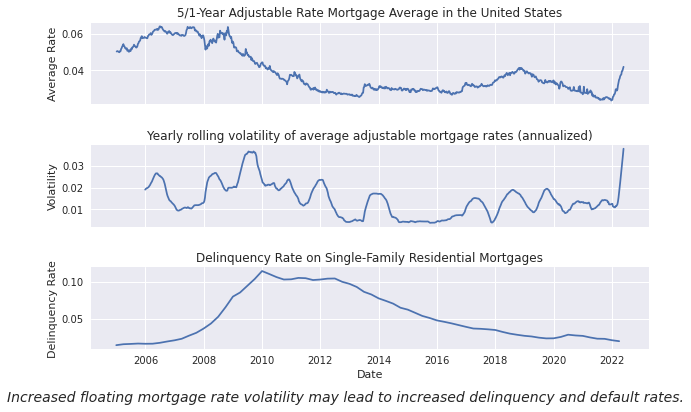

In [222]:
# Plot insights
plt.style.use("seaborn")
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0.5)
axs[0].plot(floating_df)
axs[0].set_title("5/1-Year Adjustable Rate Mortgage Average in the United States")
axs[0].set_ylabel("Average Rate")
axs[1].plot(vol_floating_df)
axs[1].set_title("Yearly rolling volatility of average adjustable mortgage rates (annualized)")
axs[1].set_ylabel("Volatility")
axs[2].plot(delinq_df)
axs[2].set_ylabel("Delinquency Rate")
axs[2].set_title("Delinquency Rate on Single-Family Residential Mortgages")
axs[2].set_xlabel("Date")
axs[2].text(-0.15, -0.60, "Increased floating mortgage rate volatility may lead to increased delinquency and default rates.", transform=axs[2].transAxes, fontsize=14, va='center', fontstyle="italic")

            Avg rate  Fed Funds Rate
DATE                                
2005-01-06       NaN             NaN
2005-01-13  0.003976             NaN
2005-01-20  0.000000             NaN
2005-01-27 -0.005941             NaN
2005-02-03 -0.003984             NaN
...              ...             ...
2022-02-01       NaN        0.000000
2022-03-01       NaN        1.500000
2022-04-01       NaN        0.650000
2022-05-01       NaN        1.333333
2022-06-01       NaN        0.571429

[1118 rows x 2 columns]


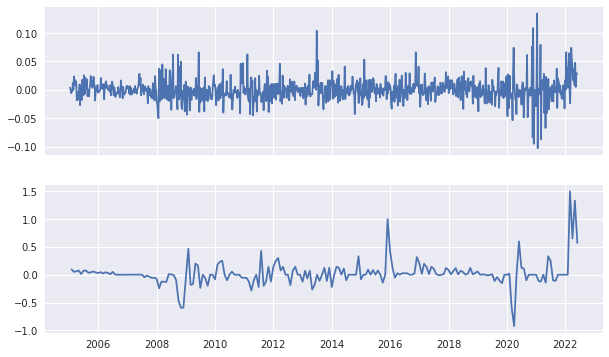

In [223]:
# Create percent difference dataframes from the previous ones.
pctdiff_floating_df = floating_df.pct_change()
pctdiff_fedfunds_df = fedfunds_df.pct_change()

# Concatanate two dataframes into one, clean the data.
pctdiff_floating_fedfunds_df = pd.concat([pctdiff_floating_df, pctdiff_fedfunds_df], axis=0, join="outer")
#pctdiff_floating_fedfunds_df.ffill(axis="columns", inplace=True)
print(pctdiff_floating_fedfunds_df)

# Plot insights
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
axs[0].plot(pctdiff_floating_fedfunds_df["Avg rate"])
axs[1].plot(pctdiff_floating_fedfunds_df["Fed Funds Rate"])